@misc{hgupta01,
  author = {hgupta01},
  title = {svm_classification_keras},
  year = {2019},
  publisher = {GitHub},
  journal = {GitHub repository},
  url = {\url{https://github.com/hgupta01/svm_classification_keras}}
}

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Input, Activation, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications import ResNet50
import numpy as np

import keras
from keras.datasets import mnist
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

import matplotlib.pyplot as plt

## BEST MODELS

In [ ]:
#MNIST (SVM)
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def model_1(x_input):
    x = Dense(512, activation='relu')(x_input)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(256, activation='relu')(x)
    x_out = Dropout(0.5)(x)
    return x_out
  
def model_2(x_input):
    x = Dense(800, activation='sigmoid')(x_input)
    x = Dropout(0.5)(x)
    x = Dense(200, activation='sigmoid')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(12)(x)
    return x_out

inputs = Input(shape=(784,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='linear', name='svm')(x)
model = Model(inputs, x_out)

def svm_loss(layer):
    weights = layer.weights[0]
    weights_tf = tf.convert_to_tensor(weights)
    
    def categorical_hinge_loss(y_true, y_pred):
        pos = K.sum(y_true * y_pred, axis=-1)
        neg = K.max((1.0 - y_true) * y_pred, axis=-1)
        hinge_loss = K.mean(K.maximum(0.0, neg - pos + 1), axis=-1)
        regularization_loss = 0.5*(tf.reduce_sum(tf.square(weights_tf)))
        return regularization_loss + 0.4*hinge_loss
    
    return categorical_hinge_loss

metrics = ['accuracy']
optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9)
#optimizer = tf.keras.optimizers.legacy.RMSprop(lr=2e-3, decay=1e-5)
#optimizer = tf.train.AdamOptimizer(1.e-3)

model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 200
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


Epoch 1/4
938/938 [==============================] - 34s 35ms/step - loss: 9.9445 - accuracy: 0.8264 - val_loss: 9.8505 - val_accuracy: 0.9312
Epoch 2/4
938/938 [==============================] - 14s 15ms/step - loss: 9.8603 - accuracy: 0.9247 - val_loss: 9.8316 - val_accuracy: 0.9493
Epoch 3/4
938/938 [==============================] - 13s 14ms/step - loss: 9.8431 - accuracy: 0.9416 - val_loss: 9.8222 - val_accuracy: 0.9597
Epoch 4/4
938/938 [==============================] - 13s 14ms/step - loss: 9.8315 - accuracy: 0.9528 - val_loss: 9.8171 - val_accuracy: 0.9635
Test loss: 9.817072868347168
Test accuracy: 0.9635000228881836


In [ ]:
#MNIST (softmax)
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def model_1(x_input):
    x = Dense(512, activation='relu')(x_input)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(256, activation='relu')(x)
    x_out = Dropout(0.5)(x)
    return x_out
  
def model_2(x_input):
    x = Dense(800, activation='sigmoid')(x_input)
    x = Dropout(0.5)(x)
    x = Dense(200, activation='sigmoid')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(12)(x)
    return x_out

inputs = Input(shape=(784,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='softmax')(x)
model = Model(inputs, x_out)

model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

#metrics = ['accuracy']
#optimizer = tf.keras.optimizers.legacy.RMSprop(lr=2e-3, decay=1e-5)
#optimizer = tf.train.AdamOptimizer(1.e-3)

#model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 200
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
Epoch 1/4
938/938 [==============================] - 13s 14ms/step - loss: 2.3278 - accuracy: 0.1414 - val_loss: 2.1631 - val_accuracy: 0.3480
Epoch 2/4
938/938 [==============================] - 13s 14ms/step - loss: 2.1761 - accuracy: 0.2210 - val_loss: 2.0268 - val_accuracy: 0.5438
Epoch 3/4
938/938 [==============================] - 13s 14ms/step - loss: 2.0495 - accuracy: 0.3092 - val_loss: 1.8994 - val_accuracy: 0.6307
Epoch 4/4
938/938 [==============================] - 13s 14ms/step - loss: 1.9302 - accuracy: 0.3878 - val_loss: 1.7755 - val_accuracy: 0.6827
Test loss: 1.775486946105957
Test accuracy: 0.682699978351593


In [4]:
#CIFAR10 (SVM)
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def model_1(x_input):
    x = Dense(512, activation='relu')(x_input)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x_out = Dense(256, activation='relu')(x)
    x_out = Dropout(0.2)(x)
    return x_out
  
def model_2(x_input):
    x = Dense(800, activation='sigmoid')(x_input)
    x = Dropout(0.2)(x)
    x = Dense(200, activation='sigmoid')(x)
    x = Dropout(0.2)(x)
    x_out = Dense(12)(x)
    return x_out

inputs = Input(shape=(32*32*3,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='linear', name='svm')(x)
model = Model(inputs, x_out)

def svm_loss(layer):
    weights = layer.weights[0]
    weights_tf = tf.convert_to_tensor(weights)
    
    def categorical_hinge_loss(y_true, y_pred):
        pos = K.sum(y_true * y_pred, axis=-1)
        neg = K.max((1.0 - y_true) * y_pred, axis=-1)
        hinge_loss = K.mean(K.maximum(0.0, neg - pos + 1), axis=-1)
        regularization_loss = 0.5*(tf.reduce_sum(tf.square(weights_tf)))
        return regularization_loss + 0.4*hinge_loss
    
    return categorical_hinge_loss

metrics = ['accuracy']
optimizer = tf.keras.optimizers.legacy.RMSprop(lr=2e-3, decay=1e-5)
#optimizer = tf.train.AdamOptimizer(1.e-3)

model.compile(optimizer='adam', loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 128
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

170498071/170498071 [==============================] - 7s 0us/step
50000 train samples
10000 test samples


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/4
391/391 [==============================] - 32s 75ms/step - loss: 10.2673 - accuracy: 0.1069 - val_loss: 10.2357 - val_accuracy: 0.1002
Epoch 2/4
391/391 [==============================] - 22s 57ms/step - loss: 10.2357 - accuracy: 0.1000 - val_loss: 10.2357 - val_accuracy: 0.1005
Epoch 3/4
391/391 [==============================] - 21s 54ms/step - loss: 10.2357 - accuracy: 0.1000 - val_loss: 10.2357 - val_accuracy: 0.1002
Epoch 4/4
391/391 [==============================] - 23s 58ms/step - loss: 10.2357 - accuracy: 0.1001 - val_loss: 10.2357 - val_accuracy: 0.1003
Test loss: 10.235673904418945
Test accuracy: 0.10029999911785126


In [5]:
#CIFAR10 (Softmax)
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def model_1(x_input):
    x = Dense(512, activation='relu')(x_input)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x_out = Dense(256, activation='relu')(x)
    x_out = Dropout(0.2)(x)
    return x_out
  
def model_2(x_input):
    x = Dense(800, activation='sigmoid')(x_input)
    x = Dropout(0.2)(x)
    x = Dense(200, activation='sigmoid')(x)
    x = Dropout(0.2)(x)
    x_out = Dense(12)(x)
    return x_out

inputs = Input(shape=(32*32*3,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='softmax')(x)
model = Model(inputs, x_out)

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
#optimizer = tf.train.AdamOptimizer(1.e-3)

batch_size = 128
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

50000 train samples
10000 test samples
Epoch 1/4
391/391 [==============================] - 23s 56ms/step - loss: 1.9238 - accuracy: 0.3080 - val_loss: 1.7072 - val_accuracy: 0.3943
Epoch 2/4
391/391 [==============================] - 23s 59ms/step - loss: 1.7054 - accuracy: 0.3881 - val_loss: 1.6188 - val_accuracy: 0.4225
Epoch 3/4
391/391 [==============================] - 20s 52ms/step - loss: 1.6218 - accuracy: 0.4224 - val_loss: 1.5931 - val_accuracy: 0.4279
Epoch 4/4
391/391 [==============================] - 23s 58ms/step - loss: 1.5676 - accuracy: 0.4400 - val_loss: 1.5093 - val_accuracy: 0.4585
Test loss: 1.5093368291854858
Test accuracy: 0.4584999978542328


## PAPER MODELS (Replication to the best of our abilities)

In [ ]:
#MNIST (SVM) - According to paper
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def model_1(x_input):
    x = Dense(512, activation='relu')(x_input)
    x_out = Dense(512, activation='relu')(x)

    return x_out
  
def model_2(x_input):
    x = Dense(800, activation='sigmoid')(x_input)
    x = Dropout(0.5)(x)
    x = Dense(200, activation='sigmoid')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(12)(x)
    return x_out

inputs = Input(shape=(784,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='linear', name='svm')(x)
model = Model(inputs, x_out)

def svm_loss(layer):
    weights = layer.weights[0]
    weights_tf = tf.convert_to_tensor(weights)
    
    def categorical_hinge_loss(y_true, y_pred):
        pos = K.sum(y_true * y_pred, axis=-1)
        neg = K.max((1.0 - y_true) * y_pred, axis=-1)
        hinge_loss = K.mean(K.maximum(0.0, neg - pos + 1), axis=-1)
        regularization_loss = 0.5*(tf.reduce_sum(tf.square(weights_tf)))
        return regularization_loss + 0.4*hinge_loss
    
    return categorical_hinge_loss

metrics = ['accuracy']
optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9)
model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 200
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


60000 train samples
10000 test samples
Epoch 1/4
300/300 [==============================] - 6s 20ms/step - loss: 9.8811 - accuracy: 0.8403 - val_loss: 9.8052 - val_accuracy: 0.9253
Epoch 2/4
300/300 [==============================] - 5s 15ms/step - loss: 9.7979 - accuracy: 0.9309 - val_loss: 9.7860 - val_accuracy: 0.9422
Epoch 3/4
300/300 [==============================] - 6s 19ms/step - loss: 9.7824 - accuracy: 0.9446 - val_loss: 9.7767 - val_accuracy: 0.9495
Epoch 4/4
300/300 [==============================] - 4s 15ms/step - loss: 9.7731 - accuracy: 0.9532 - val_loss: 9.7697 - val_accuracy: 0.9568
Test loss: 9.769701957702637
Test accuracy: 0.9567999839782715


In [ ]:
#MNIST (softmax) - According to paper
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def model_1(x_input):
    x = Dense(512, activation='relu')(x_input)
    x_out = Dense(512, activation='relu')(x)

    return x_out
  
def model_2(x_input):
    x = Dense(800, activation='sigmoid')(x_input)
    x = Dropout(0.5)(x)
    x = Dense(200, activation='sigmoid')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(12)(x)
    return x_out

inputs = Input(shape=(784,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='softmax')(x)
model = Model(inputs, x_out)
optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9)
model.compile(optimizer=optimizer,
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

batch_size = 200
epochs = 4

print(batch_size)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



60000 train samples
10000 test samples
200
Epoch 1/4
300/300 [==============================] - 5s 15ms/step - loss: 0.5225 - accuracy: 0.8585 - val_loss: 0.2523 - val_accuracy: 0.9282
Epoch 2/4
300/300 [==============================] - 6s 20ms/step - loss: 0.2320 - accuracy: 0.9334 - val_loss: 0.1916 - val_accuracy: 0.9454
Epoch 3/4
300/300 [==============================] - 4s 15ms/step - loss: 0.1813 - accuracy: 0.9481 - val_loss: 0.1591 - val_accuracy: 0.9529
Epoch 4/4
300/300 [==============================] - 5s 18ms/step - loss: 0.1463 - accuracy: 0.9583 - val_loss: 0.1351 - val_accuracy: 0.9607
Test loss: 0.1351233720779419
Test accuracy: 0.9606999754905701


In [ ]:
#CIFAR10 (SVM) - according to paper
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.reshape(50000, 32, 32, 3)
x_test = x_test.reshape(10000, 32, 32, 3)

'''def model_1(x_input):
    x = Dense(512, activation='relu')(x_input)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x_out = Dense(256, activation='relu')(x)
    x_out = Dropout(0.2)(x)
    return x_out
    '''

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

def model_1(x_input):
    x = Conv2D(32, (5, 5), activation='relu',input_shape=(32,32,3))(x_input)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (5, 5), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(3072, activation='relu')(x)
    x_out = Dropout(0.2)(x)

    return x_out


inputs = Input(shape=(32, 32, 3))

x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='linear', name='svm')(x)
model = Model(inputs, x_out)

def svm_loss(layer):
    weights = layer.weights[0]
    weights_tf = tf.convert_to_tensor(weights)
    
    def categorical_hinge_loss(y_true, y_pred):
        pos = K.sum(y_true * y_pred, axis=-1)
        neg = K.max((1.0 - y_true) * y_pred, axis=-1)
        hinge_loss = K.mean(K.maximum(0.0, neg - pos + 1), axis=-1)
        regularization_loss = 0.5*(tf.reduce_sum(tf.square(weights_tf)))
        return regularization_loss + 0.4*hinge_loss
    
    return categorical_hinge_loss


optimizer = tf.keras.optimizers.AdamW()
#optimizer = tf.train.AdamOptimizer(1.e-3)

model.compile(optimizer='adam', loss=svm_loss(model.get_layer('svm')), metrics = ['accuracy'])

batch_size = 128
epochs = 4



50000 train samples
10000 test samples


In [ ]:
model.summary()

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/4
 2/50 [>.............................] - ETA: 8:56 - loss: 10.9087 - accuracy: 0.1125 

KeyboardInterrupt: ignored

In [ ]:
#CIFAR10 (Softmax) - according to paper
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32, 32, 3)
x_test = x_test.reshape(10000, 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def model_1(x_input):
    x = Conv2D(32, (5, 5), activation='relu')(x_input)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (5, 5), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(3072, activation='relu')(x)
    x_out = Dropout(0.2)(x)

    return x_out


inputs = Input(shape=(32, 32, 3))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='softmax')(x)
model = Model(inputs, x_out)

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
#optimizer = tf.train.AdamOptimizer(1.e-3)

batch_size = 128
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


## EXPERIMENTS

In [ ]:
#best batch size mnist/svm
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def model_1(x_input):
    x = Dense(512, activation='relu')(x_input)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(256, activation='relu')(x)
    x_out = Dropout(0.5)(x)
    return x_out
  
def model_2(x_input):
    x = Dense(800, activation='sigmoid')(x_input)
    x = Dropout(0.5)(x)
    x = Dense(200, activation='sigmoid')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(12)(x)
    return x_out

inputs = Input(shape=(784,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='linear', name='svm')(x)
model = Model(inputs, x_out)

def svm_loss(layer):
    weights = layer.weights[0]
    weights_tf = tf.convert_to_tensor(weights)
    
    def categorical_hinge_loss(y_true, y_pred):
        pos = K.sum(y_true * y_pred, axis=-1)
        neg = K.max((1.0 - y_true) * y_pred, axis=-1)
        hinge_loss = K.mean(K.maximum(0.0, neg - pos + 1), axis=-1)
        regularization_loss = 0.5*(tf.reduce_sum(tf.square(weights_tf)))
        return regularization_loss + 0.4*hinge_loss
    
    return categorical_hinge_loss

metrics = ['accuracy']
optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9)
model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

epochs = 4
batch_size = [16, 32, 64, 128, 200, 256]
best_batch_size = []

for i in batch_size:
  x = model.fit(x_train, y_train,
                      batch_size=i,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  best_batch_size.append(score[1])

60000 train samples
10000 test samples
Epoch 1/4
3750/3750 [==============================] - 33s 9ms/step - loss: 10.0505 - accuracy: 0.8953 - val_loss: 9.9905 - val_accuracy: 0.9577
Epoch 2/4
3750/3750 [==============================] - 32s 9ms/step - loss: 9.9958 - accuracy: 0.9537 - val_loss: 9.9776 - val_accuracy: 0.9694
Epoch 3/4
3750/3750 [==============================] - 31s 8ms/step - loss: 9.9843 - accuracy: 0.9656 - val_loss: 9.9749 - val_accuracy: 0.9721
Epoch 4/4
3750/3750 [==============================] - 33s 9ms/step - loss: 9.9767 - accuracy: 0.9723 - val_loss: 9.9720 - val_accuracy: 0.9762
Epoch 1/4
1875/1875 [==============================] - 19s 10ms/step - loss: 9.9685 - accuracy: 0.9804 - val_loss: 9.9694 - val_accuracy: 0.9772
Epoch 2/4
1875/1875 [==============================] - 20s 11ms/step - loss: 9.9655 - accuracy: 0.9835 - val_loss: 9.9674 - val_accuracy: 0.9788
Epoch 3/4
1875/1875 [==============================] - 19s 10ms/step - loss: 9.9635 - accuracy

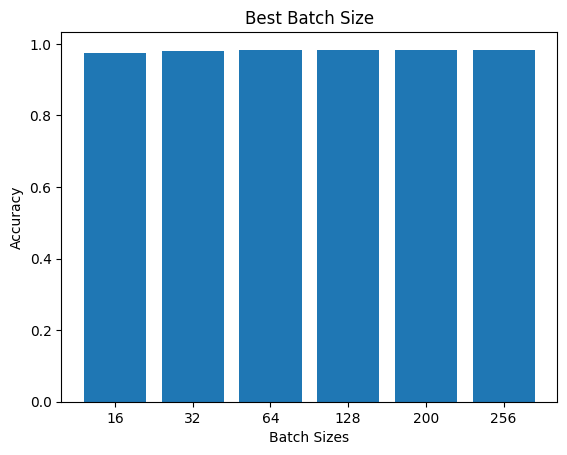

In [ ]:
batch_size = ['16', '32', '64', '128', '200', '256']

plt.bar(batch_size, best_batch_size)
plt.title('Best Batch Size (MNIST/SVM)')
plt.xlabel('Batch Sizes')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#best batch size mnist/softmax
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def model_1(x_input):
    x = Dense(512, activation='relu')(x_input)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(256, activation='relu')(x)
    x_out = Dropout(0.5)(x)
    return x_out
  
def model_2(x_input):
    x = Dense(800, activation='sigmoid')(x_input)
    x = Dropout(0.5)(x)
    x = Dense(200, activation='sigmoid')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(12)(x)
    return x_out

inputs = Input(shape=(784,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='softmax')(x)
model = Model(inputs, x_out)
optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9)
model.compile(optimizer=optimizer,
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

epochs = 4
batch_size = [16, 32, 64, 128, 200, 256]
best_batch_size = []

for i in batch_size:
  x = model.fit(x_train, y_train,
                      batch_size=i,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  best_batch_size.append(score[1])

60000 train samples
10000 test samples
Epoch 1/4
3750/3750 [==============================] - 35s 9ms/step - loss: 0.3027 - accuracy: 0.9086 - val_loss: 0.1235 - val_accuracy: 0.9606
Epoch 2/4
3750/3750 [==============================] - 32s 9ms/step - loss: 0.1384 - accuracy: 0.9590 - val_loss: 0.0975 - val_accuracy: 0.9704
Epoch 3/4
3750/3750 [==============================] - 32s 8ms/step - loss: 0.0992 - accuracy: 0.9704 - val_loss: 0.0871 - val_accuracy: 0.9759
Epoch 4/4
3750/3750 [==============================] - 33s 9ms/step - loss: 0.0817 - accuracy: 0.9749 - val_loss: 0.0765 - val_accuracy: 0.9779
Epoch 1/4
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0466 - accuracy: 0.9857 - val_loss: 0.0611 - val_accuracy: 0.9830
Epoch 2/4
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0641 - val_accuracy: 0.9820
Epoch 3/4
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0300 - accuracy:

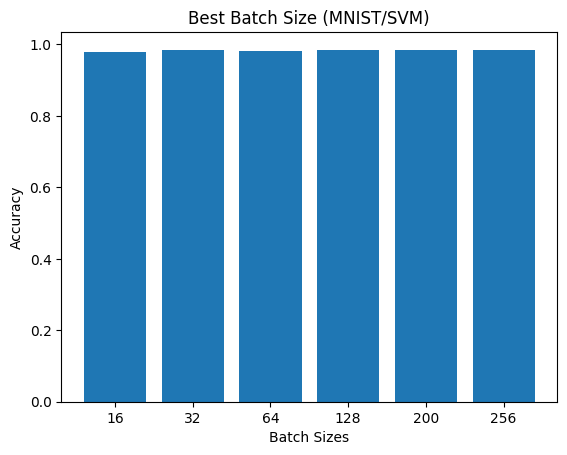

In [ ]:
batch_size = ['16', '32', '64', '128', '200', '256']

plt.bar(batch_size, best_batch_size)
plt.title('Best Batch Size (MNIST/Softmax)')
plt.xlabel('Batch Sizes')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#best batch size cifar/svm
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def model_1(x_input):
    x = Dense(512, activation='relu')(x_input)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x_out = Dense(256, activation='relu')(x)
    x_out = Dropout(0.2)(x)
    return x_out
  
def model_2(x_input):
    x = Dense(800, activation='sigmoid')(x_input)
    x = Dropout(0.2)(x)
    x = Dense(200, activation='sigmoid')(x)
    x = Dropout(0.2)(x)
    x_out = Dense(12)(x)
    return x_out

inputs = Input(shape=(32*32*3,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='linear', name='svm')(x)
model = Model(inputs, x_out)

def svm_loss(layer):
    weights = layer.weights[0]
    weights_tf = tf.convert_to_tensor(weights)
    
    def categorical_hinge_loss(y_true, y_pred):
        pos = K.sum(y_true * y_pred, axis=-1)
        neg = K.max((1.0 - y_true) * y_pred, axis=-1)
        hinge_loss = K.mean(K.maximum(0.0, neg - pos + 1), axis=-1)
        regularization_loss = 0.5*(tf.reduce_sum(tf.square(weights_tf)))
        return regularization_loss + 0.4*hinge_loss
    
    return categorical_hinge_loss

metrics = ['accuracy']
optimizer = tf.keras.optimizers.legacy.RMSprop(lr=2e-3, decay=1e-5)
#optimizer = tf.train.AdamOptimizer(1.e-3)

model.compile(optimizer='adam', loss=svm_loss(model.get_layer('svm')), metrics=metrics)

epochs = 4
batch_size = [16, 32, 64, 128, 200, 256]
best_batch_size = []
test_error = []

for i in batch_size:
  x = model.fit(x_train, y_train,
                      batch_size=i,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  best_batch_size.append(score[1])
  test_error.append(score[0])

50000 train samples
10000 test samples


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


196/196 [==============================] - 13s 68ms/step - loss: 10.1279 - accuracy: 0.1000 - val_loss: 10.1279 - val_accuracy: 0.1000


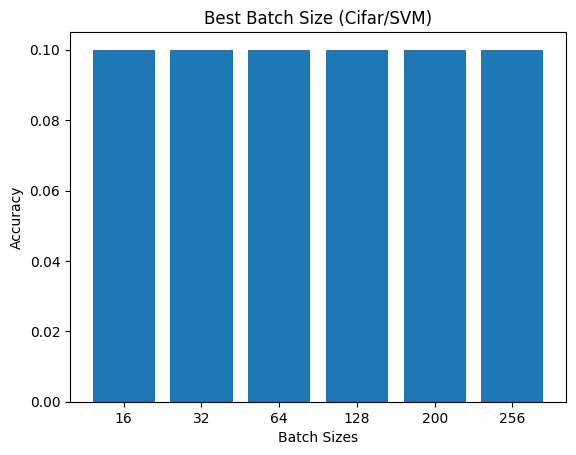

In [ ]:
batch_size = ['16', '32', '64', '128', '200', '256']

plt.bar(batch_size, best_batch_size)
plt.title('Best Batch Size (Cifar/SVM)')
plt.xlabel('Batch Sizes')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
test_error

[10.127924919128418,
 10.127924919128418,
 10.127924919128418,
 10.127924919128418,
 10.127924919128418,
 10.127924919128418]

In [ ]:
#best batch size cifar/softmax
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def model_1(x_input):
    x = Dense(512, activation='relu')(x_input)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x_out = Dense(256, activation='relu')(x)
    x_out = Dropout(0.2)(x)
    return x_out
  
def model_2(x_input):
    x = Dense(800, activation='sigmoid')(x_input)
    x = Dropout(0.2)(x)
    x = Dense(200, activation='sigmoid')(x)
    x = Dropout(0.2)(x)
    x_out = Dense(12)(x)
    return x_out

inputs = Input(shape=(32*32*3,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='softmax')(x)
model = Model(inputs, x_out)

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
#optimizer = tf.train.AdamOptimizer(1.e-3)

epochs = 4
batch_size = [16, 32, 64, 128, 200, 256]
best_batch_size = []
test_error = []

for i in batch_size:
  x = model.fit(x_train, y_train,
                      batch_size=i,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  best_batch_size.append(score[1])
  test_error.append(score[0])

50000 train samples
10000 test samples
Epoch 1/4
3125/3125 [==============================] - 81s 26ms/step - loss: 1.9383 - accuracy: 0.2846 - val_loss: 1.8040 - val_accuracy: 0.3406
Epoch 2/4
3125/3125 [==============================] - 76s 24ms/step - loss: 1.8153 - accuracy: 0.3354 - val_loss: 1.7833 - val_accuracy: 0.3527
Epoch 3/4
3125/3125 [==============================] - 75s 24ms/step - loss: 1.7861 - accuracy: 0.3481 - val_loss: 1.7370 - val_accuracy: 0.3664
Epoch 4/4
3125/3125 [==============================] - 74s 24ms/step - loss: 1.7669 - accuracy: 0.3581 - val_loss: 1.7146 - val_accuracy: 0.3814
Epoch 1/4
1563/1563 [==============================] - 43s 27ms/step - loss: 1.7143 - accuracy: 0.3810 - val_loss: 1.6854 - val_accuracy: 0.3904
Epoch 2/4
1563/1563 [==============================] - 44s 28ms/step - loss: 1.6934 - accuracy: 0.3884 - val_loss: 1.6674 - val_accuracy: 0.3967
Epoch 3/4
1563/1563 [==============================] - 44s 28ms/step - loss: 1.6799 - accur

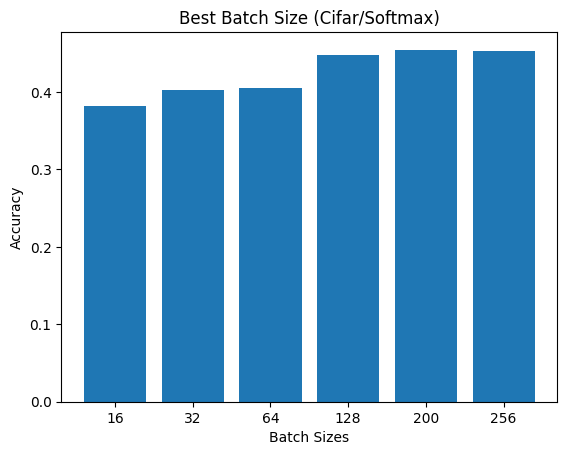

In [ ]:
batch_size = ['16', '32', '64', '128', '200', '256']

plt.bar(batch_size, best_batch_size)
plt.title('Best Batch Size (Cifar/Softmax)')
plt.xlabel('Batch Sizes')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
test_error

[1.7145668268203735,
 1.6563949584960938,
 1.652593731880188,
 1.5674803256988525,
 1.533727765083313,
 1.5270346403121948]

## EXTRA

In [ ]:
#mnist softmax
(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows, img_cols=28, 28
 
if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)
 
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(250))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# a softmax classifier
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

#opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

#opt = tf.keras.optimizers.legacy.RMSprop(lr=2e-3, decay=1e-5)
#model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=64,epochs=4,validation_data=(x_test, y_test),shuffle=True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation_4 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 activation_5 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
               

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.backend import relu
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import random
import seaborn as sns
import itertools
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications import ResNet50

#LOADING DATASET
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(256, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# a softmax classifier
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

#opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
opt = tf.keras.optimizers.legacy.RMSprop(lr=2e-3, decay=1e-5)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=64,epochs=4,validation_data=(x_test, y_test),shuffle=True)

%matplotlib inline
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()
# list all data in history
print(history.history.keys())

plotmodelhistory(history)

170498071/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       590080    
                                                                 
 activation_1 (Activation)   (None, 30, 30, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                      

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/4
782/782 [==============================] - 3695s 5s/step - loss: 3.1529 - accuracy: 0.2811 - val_loss: 1.7615 - val_accuracy: 0.3668
Epoch 2/4
782/782 [==============================] - 3646s 5s/step - loss: 1.5854 - accuracy: 0.4360 - val_loss: 1.5946 - val_accuracy: 0.4481
Epoch 3/4
530/782 [===================>..........] - ETA: 18:31 - loss: 1.4479 - accuracy: 0.4958

GRAPHS FOR DIFFERENT OPTIMIZERS

In [ ]:
#MNIST (SVM)
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def model_1(x_input):
    x = Dense(512, activation='relu')(x_input)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(256, activation='relu')(x)
    x_out = Dropout(0.5)(x)
    return x_out
  
def model_2(x_input):
    x = Dense(800, activation='sigmoid')(x_input)
    x = Dropout(0.5)(x)
    x = Dense(200, activation='sigmoid')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(12)(x)
    return x_out

inputs = Input(shape=(784,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='linear', name='svm')(x)
model = Model(inputs, x_out)

def svm_loss(layer):
    weights = layer.weights[0]
    weights_tf = tf.convert_to_tensor(weights)
    
    def categorical_hinge_loss(y_true, y_pred):
        pos = K.sum(y_true * y_pred, axis=-1)
        neg = K.max((1.0 - y_true) * y_pred, axis=-1)
        hinge_loss = K.mean(K.maximum(0.0, neg - pos + 1), axis=-1)
        regularization_loss = 0.5*(tf.reduce_sum(tf.square(weights_tf)))
        return regularization_loss + 0.4*hinge_loss
    
    return categorical_hinge_loss
xLabels=['SGD','RMSProp','Adam','AdamW']
yVal=[]
metrics = ['accuracy']
optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9)

#optimizer = tf.keras.optimizers.legacy.RMSprop(lr=2e-3, decay=1e-5)
#optimizer = tf.train.AdamOptimizer(1.e-3)

model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 200
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

yVal.append(score[1])

#optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9)

optimizer = tf.keras.optimizers.legacy.RMSprop(lr=0.1, decay=1e-5, momentum=0.9)
#optimizer = tf.train.AdamOptimizer(1.e-3)

model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 200
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
yVal.append(score[1])

#optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9)

#optimizer = tf.keras.optimizers.legacy.RMSprop(lr=2e-3, decay=1e-5)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 200
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
yVal.append(score[1])

#optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9)

#optimizer = tf.keras.optimizers.legacy.RMSprop(lr=2e-3, decay=1e-5)
#optimizer = tf.train.AdamOptimizer(1.e-3)
optimizer= tf.keras.optimizers.AdamW(learning_rate=0.1)
model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 200
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
yVal.append(score[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])
import matplotlib.pyplot as plt
plt.title('MNIST SVM Different Optimization Functions')
plt.bar(xLabels, yVal)
plt.show()

In [ ]:
#MNIST (softmax)
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def model_1(x_input):
    x = Dense(512, activation='relu')(x_input)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(256, activation='relu')(x)
    x_out = Dropout(0.5)(x)
    return x_out
  
def model_2(x_input):
    x = Dense(800, activation='sigmoid')(x_input)
    x = Dropout(0.5)(x)
    x = Dense(200, activation='sigmoid')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(12)(x)
    return x_out
xLabels=['SGD','RMSProp','Adam','AdamW']
yVal=[]
inputs = Input(shape=(784,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='softmax')(x)
model = Model(inputs, x_out)
optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9)

model.compile(optimizer=optimizer,
              loss=keras.losses.categorical_crossentropy,
          
              metrics=['accuracy'])

#metrics = ['accuracy']
#optimizer = tf.keras.optimizers.legacy.RMSprop(lr=2e-3, decay=1e-5)
#optimizer = tf.train.AdamOptimizer(1.e-3)

#model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 64
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

yVal.append(score[1])


model = Model(inputs, x_out)
optimizer = tf.keras.optimizers.legacy.RMSprop(lr=0.1, decay=1e-5, momentum=0.9)
model.compile(optimizer=optimizer,
              loss=keras.losses.categorical_crossentropy,
          
              metrics=['accuracy'])

#metrics = ['accuracy']
#optimizer = tf.keras.optimizers.legacy.RMSprop(lr=2e-3, decay=1e-5)
#optimizer = tf.train.AdamOptimizer(1.e-3)

#model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 64
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

yVal.append(score[1])


model = Model(inputs, x_out)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer,
              loss=keras.losses.categorical_crossentropy,
          
              metrics=['accuracy'])

#metrics = ['accuracy']
#optimizer = tf.keras.optimizers.legacy.RMSprop(lr=2e-3, decay=1e-5)
#optimizer = tf.train.AdamOptimizer(1.e-3)

#model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 64
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

yVal.append(score[1])


model = Model(inputs, x_out)
optimizer= tf.keras.optimizers.AdamW(learning_rate=0.1)
model.compile(optimizer=optimizer,
              loss=keras.losses.categorical_crossentropy,
          
              metrics=['accuracy'])

#metrics = ['accuracy']
#optimizer = tf.keras.optimizers.legacy.RMSprop(lr=2e-3, decay=1e-5)
#optimizer = tf.train.AdamOptimizer(1.e-3)

#model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 64
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
yVal.append(score[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
plt.title('MNIST Softmax Different Optimization Functions')
plt.bar(xLabels, yVal)
plt.show()

In [ ]:
#CIFAR10 (SVM)
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def model_1(x_input):
    x = Dense(512, activation='relu')(x_input)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x_out = Dense(256, activation='relu')(x)
    x_out = Dropout(0.2)(x)
    return x_out
  
def model_2(x_input):
    x = Dense(800, activation='sigmoid')(x_input)
    x = Dropout(0.2)(x)
    x = Dense(200, activation='sigmoid')(x)
    x = Dropout(0.2)(x)
    x_out = Dense(12)(x)
    return x_out

inputs = Input(shape=(32*32*3,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='linear', name='svm')(x)
model = Model(inputs, x_out)

def svm_loss(layer):
    weights = layer.weights[0]
    weights_tf = tf.convert_to_tensor(weights)
    
    def categorical_hinge_loss(y_true, y_pred):
        pos = K.sum(y_true * y_pred, axis=-1)
        neg = K.max((1.0 - y_true) * y_pred, axis=-1)
        hinge_loss = K.mean(K.maximum(0.0, neg - pos + 1), axis=-1)
        regularization_loss = 0.5*(tf.reduce_sum(tf.square(weights_tf)))
        return regularization_loss + 0.4*hinge_loss
    
    return categorical_hinge_loss

metrics = ['accuracy']
#optimizer = tf.keras.optimizers.legacy.RMSprop(lr=2e-3, decay=1e-5)
#optimizer = tf.train.AdamOptimizer(1.e-3)
xLabels=['SGD','RMSProp','Adam','AdamW']
yVal=[]
optimizer = tf.keras.optimizers.SGD()
model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 128
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
yVal.append(score[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

optimizer = tf.keras.optimizers.legacy.RMSprop()
model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 128
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
yVal.append(score[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 128
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
yVal.append(score[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])
optimizer= tf.keras.optimizers.AdamW()

model.compile(optimizer=optimizer, loss=svm_loss(model.get_layer('svm')), metrics=metrics)

batch_size = 128
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
yVal.append(score[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])
import matplotlib.pyplot as plt
plt.title('CIFAR10 SVM Different Optimization Functions')
plt.bar(xLabels, yVal)
plt.show()

In [ ]:
#CIFAR10 (Softmax)
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10
xLabels=['SGD','RMSProp','Adam','AdamW']
yVal=[]
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def model_1(x_input):
    x = Dense(512, activation='relu')(x_input)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x_out = Dense(256, activation='relu')(x)
    x_out = Dropout(0.2)(x)
    return x_out
  
def model_2(x_input):
    x = Dense(800, activation='sigmoid')(x_input)
    x = Dropout(0.2)(x)
    x = Dense(200, activation='sigmoid')(x)
    x = Dropout(0.2)(x)
    x_out = Dense(12)(x)
    return x_out

inputs = Input(shape=(32*32*3,))
x      = model_1(inputs)
x_out  = Dense(10, use_bias=False, activation='softmax')(x)
model = Model(inputs, x_out)
optimizer = tf.keras.optimizers.SGD()
model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
#optimizer = tf.train.AdamOptimizer(1.e-3)

batch_size = 128
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
yVal.append(score[1])


model = Model(inputs, x_out)
optimizer = tf.keras.optimizers.legacy.RMSprop()
model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
#optimizer = tf.train.AdamOptimizer(1.e-3)

batch_size = 128
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
yVal.append(score[1])


model = Model(inputs, x_out)
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
#optimizer = tf.train.AdamOptimizer(1.e-3)

batch_size = 128
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
yVal.append(score[1])


model = Model(inputs, x_out)
optimizer= tf.keras.optimizers.AdamW()
model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
#optimizer = tf.train.AdamOptimizer(1.e-3)

batch_size = 128
epochs = 4

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
yVal.append(score[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
plt.title('CIFAR10 Softmax Different Optimization Functions')
plt.bar(xLabels, yVal)
plt.show()